<a href="https://colab.research.google.com/github/nipun-taneja/sarcasm-detection-distilbert-vs-naive-bayes/blob/main/sarcasm_detection_distilbert_vs_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sarcasm Detection Project: Naive Bayes vs DistilBERT

This notebook presents an end-to-end project on sarcasm detection using two approaches:

1. **Naive Bayes baseline** with bag-of-words features.  
2. **Fine-tuned DistilBERT transformer** for binary classification.

---

## Objectives
- Train and evaluate a Naive Bayes classifier on a sarcasm dataset.  
- Fine-tune DistilBERT for sarcasm detection on the same dataset.  
- Compare metrics (Accuracy, Precision, Recall, F1) between the two approaches.  
- Visualize results and analyze errors.  
- Discuss trade-offs between classical and transformer-based NLP models.

---


## Part 1: Naive Bayes Baseline

We start with a simple Naive Bayes classifier as a baseline for sarcasm detection.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/news-headlines-dataset-for-sarcasm-detection


In [ ]:
# Load the dataset
data = pd.read_json('/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json', lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
# Display basic dataset information
print(f"Dataset shape: {data.shape}")
print(f"Class distribution:\n{data['is_sarcastic'].value_counts()}")

Dataset shape: (26709, 3)
Class distribution:
is_sarcastic
0    14985
1    11724
Name: count, dtype: int64


In [ ]:
# Display sample headlines
print("\nSample non-sarcastic headlines:")
print(data[data['is_sarcastic'] == 0]['headline'].head(3).tolist())
print("\nSample sarcastic headlines:")
print(data[data['is_sarcastic'] == 1]['headline'].head(3).tolist())


Sample non-sarcastic headlines:
["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", 'j.k. rowling wishes snape happy birthday in the most magical way']

Sample sarcastic headlines:
["mom starting to fear son's web series closest thing she will have to grandchild", 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'top snake handler leaves sinking huckabee campaign']


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def preprocess_text(text):
    """
    Preprocess text using Porter Stemmer:
    1. Convert to lowercase
    2. Remove special characters and numbers
    3. Tokenize the text
    4. Remove stopwords
    5. Apply stemming
    6. Join tokens back into a string
    """
    # Initialize stemmer and stopwords
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and apply stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # Join tokens back into a string
    return ' '.join(stemmed_tokens)

# Apply preprocessing to the dataset
data['processed_headline'] = data['headline'].apply(preprocess_text)

In [ ]:
# Display examples of preprocessing
for i in range(3):
    print(f"Original: {data['headline'].iloc[i]}")
    print(f"Processed: {data['processed_headline'].iloc[i]}")
    print("")

Original: former versace store clerk sues over secret 'black code' for minority shoppers
Processed: former versac store clerk sue secret black code minor shopper

Original: the 'roseanne' revival catches up to our thorny political mood, for better and worse
Processed: roseann reviv catch thorni polit mood better wors

Original: mom starting to fear son's web series closest thing she will have to grandchild
Processed: mom start fear son web seri closest thing grandchild



In [ ]:
# Split the data into training and testing sets
X = data['processed_headline']
y = data['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 18696
Testing set size: 8013


In [ ]:
# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

print(f"Training features shape: {X_train_features.shape}")

Training features shape: (18696, 5000)


In [ ]:
# Train the Multinomial Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train_features, y_train)

MultinomialNB()

In [ ]:
y_pred = clf.predict(X_test_features)
# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      4444
           1       0.77      0.74      0.76      3569

    accuracy                           0.79      8013
   macro avg       0.79      0.78      0.78      8013
weighted avg       0.79      0.79      0.79      8013




Confusion Matrix:
[[3673  771]
 [ 936 2633]]


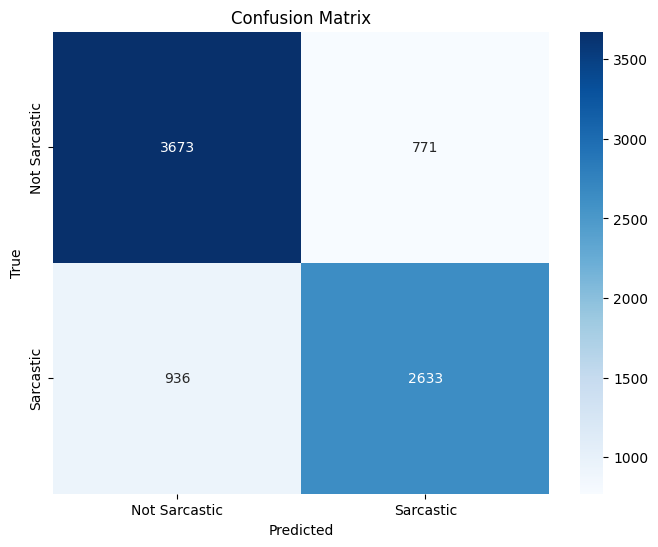

In [ ]:
# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sarcastic', 'Sarcastic'],
            yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
def extract_top_words(vectorizer, classifier, class_label, n=10):
    """Extract top n words for a given class"""
    feature_names = vectorizer.get_feature_names_out()
    class_idx = list(classifier.classes_).index(class_label)
    top_indices = classifier.feature_log_prob_[class_idx].argsort()[-n:]
    return [feature_names[i] for i in top_indices]


# Extract top words for sarcastic and non-sarcastic headlines
print("\nTop words for sarcastic headlines:")
sarcastic_top_words = extract_top_words(vectorizer, clf, 1)
for word in reversed(sarcastic_top_words):
    print(f"- {word}")

print("\nTop words for non-sarcastic headlines:")
non_sarcastic_top_words = extract_top_words(vectorizer, clf, 0)
for word in reversed(non_sarcastic_top_words):
    print(f"- {word}")


Top words for sarcastic headlines:
- man
- new
- report
- area
- nation
- get
- woman
- one
- american
- make

Top words for non-sarcastic headlines:
- trump
- new
- say
- donald
- get
- make
- us
- women
- year
- one


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

In [ ]:
# We're using DistilBERT — a smaller, faster version of BERT that still retains most of its power
model_name = "distilbert-base-uncased"

# Load the tokenizer which turns raw text into input tokens for the model
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the base model — no classification head yet, just raw language understanding
model = AutoModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
from torch.nn.functional import cosine_similarity
# Function to get the [CLS] embedding (first token) from a given sentence
def get_cls_emb(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        return model(**inputs).last_hidden_state[0][0]  # [CLS] token

# Two emotionally opposite sentences
happy = "I am feeling joyful and grateful today."
sad = "I feel so alone and abandoned."


# Extract embeddings from base model
emb_happy = get_cls_emb(happy)
emb_sad = get_cls_emb(sad)

sim = cosine_similarity(emb_happy.unsqueeze(0), emb_sad.unsqueeze(0)).item()
print("Cosine similarity:", round(sim, 4))

Cosine similarity: 0.9586


In [ ]:
from transformers import AutoModelForSequenceClassification


In [ ]:
# Load DistilBERT again, but this time with a classification head (2 outputs: sad=0, happy=1)
model_cls = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch.nn.functional as F
# Inference function to predict emotion from text

def predict(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        logits = model_cls(**inputs).logits  # Raw output scores from the classification head
        probs = F.softmax(logits, dim=1)     # Convert logits to probabilities
    label = "Happy 😀" if torch.argmax(probs) == 1 else "Sad 😞"
    return label, round(probs[0].max().item(), 4)

In [ ]:
print(predict("I am very happy"))
print(predict("I am very sad"))


('Sad 😞', 0.5388)
('Sad 😞', 0.5329)


In [ ]:
texts = [
    # Happy 😀
    "I finally got the job I’ve been dreaming about!",
    "She smiled when she saw her family waiting at the airport.",
    "Waking up to a quiet sunrise made me feel at peace.",
    "He laughed until he cried at the comedy show.",
    "I got a surprise birthday party from my best friends!",
    "The puppy ran into my arms, wagging its tail excitedly.",
    "We danced all night under the stars.",
    "My favorite song came on just when I needed it.",
    "Our vacation was even better than I expected.",
    "She passed her final exam with flying colors.",
    "Winning the contest made all the hard work worth it.",
    "They hugged me tightly after I shared the good news.",
    "I felt pure joy watching the kids open their gifts.",
    "After months of saving, I finally bought my dream car.",
    "He said yes—I’m getting married!",
    "The baby giggled and took her first steps today.",
    "We reunited after years apart and it felt like no time had passed.",
    "The rainbow after the storm made everything feel magical.",
    "She baked cookies just because she knew I loved them.",
    "The smell of fresh coffee made my morning perfect.",
    "I aced my presentation and got a standing ovation!",
    "They named their baby after me—I'm honored.",
    "We watched the fireworks and held hands in silence.",
    "I found an old photo that brought back beautiful memories.",
    "I helped someone today and it felt amazing.",

    # Sad 😞
    "I felt invisible in a room full of people.",
    "Even though I smiled, I was breaking inside.",
    "It stung when they forgot my birthday—again.",
    "The rain matched my mood perfectly today.",
    "My best friend moved away and I feel so alone.",
    "I didn’t get the job I really wanted.",
    "No one noticed when I left the party early.",
    "I dropped my phone and lost all my photos.",
    "They promised to call, but they never did.",
    "I watched the sunset alone and wished things were different.",
    "I tried my best, but it still wasn’t good enough.",
    "He walked away without saying goodbye.",
    "The empty chair reminded me of who’s missing.",
    "I miss how things used to be.",
    "I cried in the car so no one would see me.",
    "I heard their laughter and felt completely left out.",
    "The silence after the fight was deafening.",
    "I failed the test and disappointed myself.",
    "They said it wasn't personal, but it hurt anyway.",
    "I scrolled through old messages, missing what we had.",
    "She didn’t show up when I needed her the most.",
    "It hurts more when they pretend everything’s fine.",
    "I feel like I'm always the second choice.",
    "Goodbyes are the hardest when they’re forever.",
    "I woke up hoping it was just a bad dream.",
]


In [ ]:
try:
  from datasets import Dataset
except ImportError:
  !pip install -q datasets
  from datasets import Dataset
# Add labels for each data point
labels = [1]*25 + [0]*25

# Wrap in Hugging Face Dataset format
dataset = Dataset.from_dict({"text": texts, "label": labels})

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Convert text to padded, truncated input IDs for model compatibility
def tokenize(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=64)

In [ ]:
# Split dataset into training and evaluation sets
tokenized = dataset.map(tokenize)
split = tokenized.train_test_split(test_size=0.25, seed=42)
train_dataset = split["train"]
eval_dataset = split["test"]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score
import numpy as np

# Load the model with classification head for training
model_cls = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


# Evaluation function to compute accuracy after each epoch
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define how training should happen
training_args = TrainingArguments(
    output_dir="./emotion-model",               # Where to save checkpoints
    per_device_train_batch_size=4,              # Small batch size for CPU
    num_train_epochs=10,                        # Train for 10 full passes
    eval_strategy="epoch",                # Evaluate after every epoch
    logging_steps=1,                            # Log every step (frequent for small data)
    save_strategy="no",                         # Don't save model checkpoints
    report_to="none"                            # Disable integration with W&B etc.
)

In [ ]:
# Wrap it all in Hugging Face Trainer API
trainer = Trainer(
    model=model_cls,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Start training
trainer.train()

/tmp/ipython-input-899714727.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.933100,0.848999,0.230769
2,0.599300,0.613912,0.538462
3,0.493400,0.376318,0.923077
4,0.102500,0.120548,1.000000
5,0.012900,0.689841,0.692308
6,0.012000,1.108574,0.615385
7,0.006600,1.006720,0.692308
8,0.008500,0.930113,0.692308
9,0.004800,0.881949,0.692308
10,0.007900,0.863899,0.692308


TrainOutput(global_step=100, training_loss=0.1818125150213018, metrics={'train_runtime': 5.9754, 'train_samples_per_second': 61.921, 'train_steps_per_second': 16.735, 'total_flos': 6126617187840.0, 'train_loss': 0.1818125150213018, 'epoch': 10.0})

In [ ]:
import torch
model_cls.to(torch.device("cpu"))

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
import torch.nn.functional as F

# Same prediction function as before, now with a trained model
def predict(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        logits = model_cls(**inputs).logits
        probs = F.softmax(logits, dim=1)
    label = "Happy 😀" if torch.argmax(probs) == 1 else "Sad 😞"
    return label, round(probs[0].max().item(), 4)

In [ ]:
print(predict("I am very happy"))        # Expect: Happy 😀
print(predict("I am feeling bad"))       # Expect: Sad 😞
print(predict("Life is beautiful"))      # Happy
print(predict("I feel alone and empty")) # Sad

('Happy 😀', 0.9928)
('Sad 😞', 0.9802)
('Happy 😀', 0.989)
('Sad 😞', 0.9934)


In [ ]:
from transformers import AutoModel
from torch.nn.functional import cosine_similarity

# Load the base (non-fine-tuned) model for comparison
base_model = AutoModel.from_pretrained("distilbert-base-uncased")

# Extract [CLS] embedding for a sentence
def get_cls_embedding(text, model):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        output = model(**inputs).last_hidden_state
        return output[0][0]  # [CLS] token

In [ ]:
happy = "I feel very happy and loved."
sad = "I feel sad"

# From base model
emb_base_happy = get_cls_embedding(happy, base_model)
emb_base_sad = get_cls_embedding(sad, base_model)
sim_base = cosine_similarity(emb_base_happy.unsqueeze(0), emb_base_sad.unsqueeze(0)).item()

# Embeddings from fine-tuned model (same architecture, new weights)
emb_ft_happy = get_cls_embedding(happy, model_cls.distilbert)
emb_ft_sad = get_cls_embedding(sad, model_cls.distilbert)
sim_ft = cosine_similarity(emb_ft_happy.unsqueeze(0), emb_ft_sad.unsqueeze(0)).item()

print(f"❌ Cosine similarity (before training): {round(sim_base, 4)}")
print(f"✅ Cosine similarity (after training):  {round(sim_ft, 4)}")

❌ Cosine similarity (before training): 0.9739
✅ Cosine similarity (after training):  0.2286


In [ ]:
# Sample lines from "Black Velvet Band" to test emotional interpretation
song_lines = [
    "Her eyes they shone like diamonds.",
    "You'd think she was queen of the land.",
    "She stole my heart and my freedom.",
    "Tied up with a Black Velvet Band."
    # ...
]


# Predict emotion for each lyric line
for line in song_lines:
    print(f"{line} →", predict(line))

Her eyes they shone like diamonds. → ('Happy 😀', 0.9922)
You'd think she was queen of the land. → ('Happy 😀', 0.9866)
She stole my heart and my freedom. → ('Happy 😀', 0.9674)
Tied up with a Black Velvet Band. → ('Happy 😀', 0.9831)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/news-headlines-dataset-for-sarcasm-detection


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

In [ ]:
# We're using DistilBERT — a smaller, faster version of BERT that still retains most of its power
model_name = "distilbert-base-uncased"

# Load the tokenizer which turns raw text into input tokens for the model
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
# Load the base model — no classification head yet, just raw language understanding
model = AutoModel.from_pretrained(model_name)

In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
# Load DistilBERT again, but this time with a classification head (2 outputs: sad=0, happy=1)
model_cls = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch.nn.functional as F
# Inference function to predict emotion from text

def predict(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        logits = model_cls(**inputs).logits  # Raw output scores from the classification head
        probs = F.softmax(logits, dim=1)     # Convert logits to probabilities
    label = "Sarcastic" if torch.argmax(probs) == 1 else "Not Sarcastic"
    return label, round(probs[0].max().item(), 4)

In [ ]:
print(predict("Is this Sarcastic?"))
print(predict("i play 60 hours a week for me to get a B"))
print(predict("i study 60 hours a week for me to get a C"))

('Not Sarcastic', 0.5077)
('Sarcastic', 0.5226)
('Sarcastic', 0.5245)


In [ ]:
!pip install -U datasets

In [ ]:
from datasets import Dataset, load_dataset
import json
# Add labels for each data point
# labels = [1]*25 + [0]*25
data_full_path = "/kaggle/input/\
news-headlines-dataset-for-sarcasm-detection/\
Sarcasm_Headlines_Dataset_v2.json"

# Load the dataset from your .jsonl file
dataset = load_dataset("json", data_files=data_full_path , split="train")

# Optional: Rename columns to 'text' and 'label' for compatibility with models
dataset = dataset.rename_columns({
    "headline": "text",
    "is_sarcastic": "label"
})

# Optional: Classify label column as categorical
dataset = dataset.class_encode_column("label")

# Opening JSON file
# with open(data_full_path) as json_file:
#   data = json_file.read()

# print(data_dict)
# Wrap in Hugging Face Dataset format
# dataset = Dataset.from_dict({"text": headline , "label": labels})

Generating train split: 0 examples [00:00, ? examples/s]

Stringifying the column:   0%|          | 0/28619 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/28619 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Convert text to padded, truncated input IDs for model compatibility
def tokenize(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=64)

In [ ]:
# Split dataset into training and evaluation sets
tokenized = dataset.map(tokenize)
split = tokenized.train_test_split(test_size=0.25, seed=42)
train_dataset = split["train"]
eval_dataset = split["test"]

Map:   0%|          | 0/28619 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score
import numpy as np

# Load the model with classification head for training
model_cls = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


# Evaluation function to compute accuracy after each epoch
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {"accuracy": accuracy_score(labels, predictions)}

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define how training should happen
training_args = TrainingArguments(
    output_dir="./saracasm-model",               # Where to save checkpoints
    per_device_train_batch_size=3,              # Small batch size for CPU
    num_train_epochs=3,                        # Train for 10 full passes
    eval_strategy="epoch",                # Evaluate after every epoch
    logging_steps=1,                            # Log every step (frequent for small data)
    save_strategy="no",                         # Don't save model checkpoints
    report_to="none"                            # Disable integration with W&B etc.
)

In [ ]:
# Wrap it all in Hugging Face Trainer API
trainer = Trainer(
    model=model_cls,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Start training
trainer.train()

/tmp/ipython-input-899714727.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.002700,0.368517,0.909993
2,0.000500,0.508263,0.903424
3,0.000100,0.518015,0.925227


TrainOutput(global_step=21465, training_loss=0.23882405541140292, metrics={'train_runtime': 981.3768, 'train_samples_per_second': 65.614, 'train_steps_per_second': 21.872, 'total_flos': 1066230091782144.0, 'train_loss': 0.23882405541140292, 'epoch': 3.0})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
device1 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_cls.to(device1)
#Saving model. because it takes lot of time to train.
torch.save(model_cls, '/content/drive/MyDrive/Colab Notebooks/model.pth')


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate predictions on the test set
def get_predictions(trainer, eval_dataset):
    preds_output = trainer.predict(eval_dataset)
    preds = np.argmax(preds_output.predictions, axis=1)
    labels = preds_output.label_ids
    texts = eval_dataset["text"]
    return preds, labels, texts

preds, labels, texts = get_predictions(trainer, eval_dataset)

# 2. Save predictions to CSV
pred_df = pd.DataFrame({
    "text": texts,
    "true_label": labels,
    "predicted_label": preds
})
pred_df.to_csv("sarcasm_predictions.csv", index=False)

# 3. Save classification report
report = classification_report(labels, preds, target_names=["Not Sarcastic", "Sarcastic"])
with open("classification_report.txt", "w") as f:
    f.write(report)
print(report)


               precision    recall  f1-score   support

Not Sarcastic       0.92      0.93      0.93      3711
    Sarcastic       0.93      0.92      0.92      3444

     accuracy                           0.93      7155
    macro avg       0.93      0.92      0.93      7155
 weighted avg       0.93      0.93      0.93      7155



In [ ]:


def get_cls_embeddings(texts, model, tokenizer):
    embs = []
    device = next(model.parameters()).device  # Get model's device
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=64, padding="max_length")
        inputs = {k: v.to(device) for k, v in inputs.items()}  # Move to GPU
        with torch.no_grad():
            output = model(**inputs).last_hidden_state
            embs.append(output[0][0].cpu().numpy())  # Move to CPU for numpy
    return np.array(embs)


In [ ]:
# Get a sample of texts for visualization (e.g., 200 random samples)
vis_sample = pred_df.sample(n=min(200, len(pred_df)), random_state=42)
vis_texts = vis_sample["text"].tolist()
vis_labels = vis_sample["true_label"].tolist()

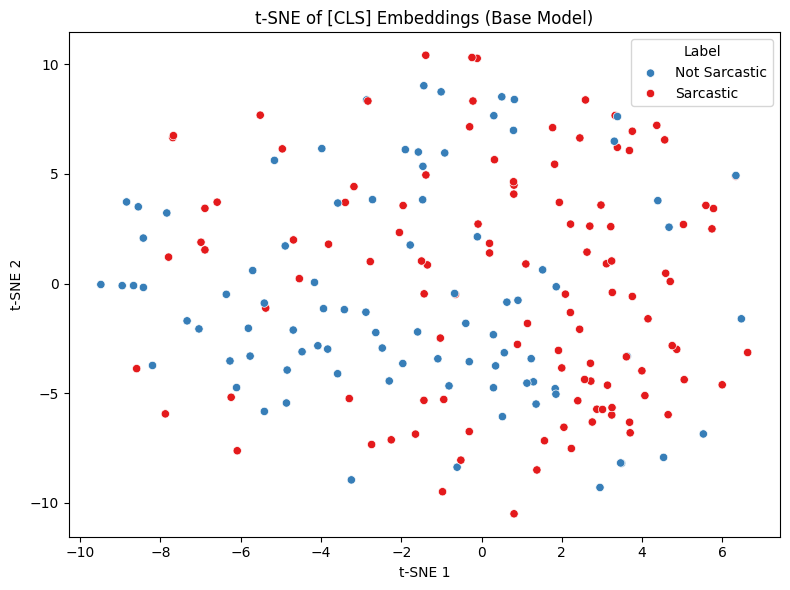

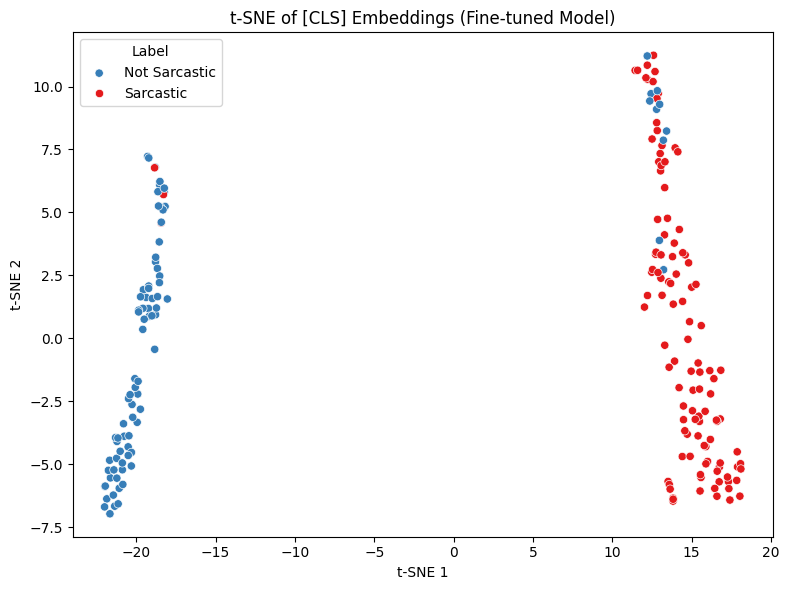

In [ ]:

# Get embeddings before fine-tuning (base model)
base_model = AutoModel.from_pretrained("distilbert-base-uncased")
embs_base = get_cls_embeddings(vis_texts, base_model, tokenizer)

# Get embeddings after fine-tuning (fine-tuned model)
embs_ft = get_cls_embeddings(vis_texts, model_cls.distilbert, tokenizer)

# Updated t-SNE visualization: show and save
for name, embs in zip(["Base", "Fine-tuned"], [embs_base, embs_ft]):
    tsne = TSNE(n_components=2, random_state=42)
    embs_2d = tsne.fit_transform(embs)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=embs_2d[:,0], y=embs_2d[:,1], hue=vis_labels, palette="Set1", legend="full")
    plt.title(f"t-SNE of [CLS] Embeddings ({name} Model)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend(title="Label", labels=["Not Sarcastic", "Sarcastic"])
    plt.tight_layout()
    plt.savefig(f"tsne_{name.lower().replace('-', '_')}.png")  # Save to file
    plt.show()

In [ ]:
# Use a smaller subset of the training data
small_train_dataset = train_dataset.select(range(min(1000, len(train_dataset))))
# Fine-tune DistilBERT on the reduced training set
small_model_cls = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device1)
small_training_args = TrainingArguments(
    output_dir="./sarcasm-model-small",
    per_device_train_batch_size=8,
    num_train_epochs=3,
    eval_strategy="epoch",
    logging_steps=1,
    save_strategy="no",
    report_to="none"
)
small_trainer = Trainer(
    model=small_model_cls,
    args=small_training_args,
    train_dataset=small_train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)
small_trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-1740275980.py:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  small_trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.497600,0.346922,0.850454
2,0.131400,0.456338,0.861076
3,0.008200,0.564547,0.862614


TrainOutput(global_step=375, training_loss=0.23066827003844081, metrics={'train_runtime': 63.4266, 'train_samples_per_second': 47.299, 'train_steps_per_second': 5.912, 'total_flos': 49675274496000.0, 'train_loss': 0.23066827003844081, 'epoch': 3.0})

DistilBERT (small training set) Classification Report:
                precision    recall  f1-score   support

Not Sarcastic       0.86      0.87      0.87      3711
    Sarcastic       0.86      0.85      0.86      3444

     accuracy                           0.86      7155
    macro avg       0.86      0.86      0.86      7155
 weighted avg       0.86      0.86      0.86      7155



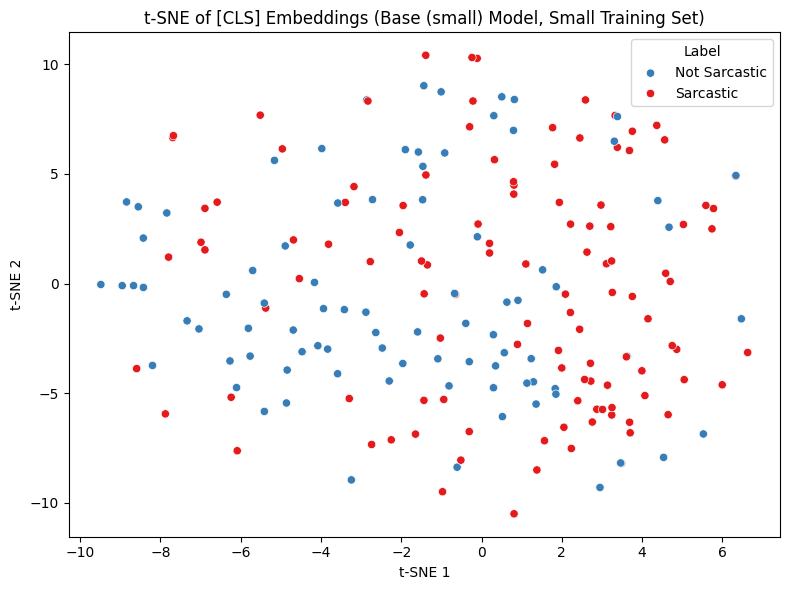

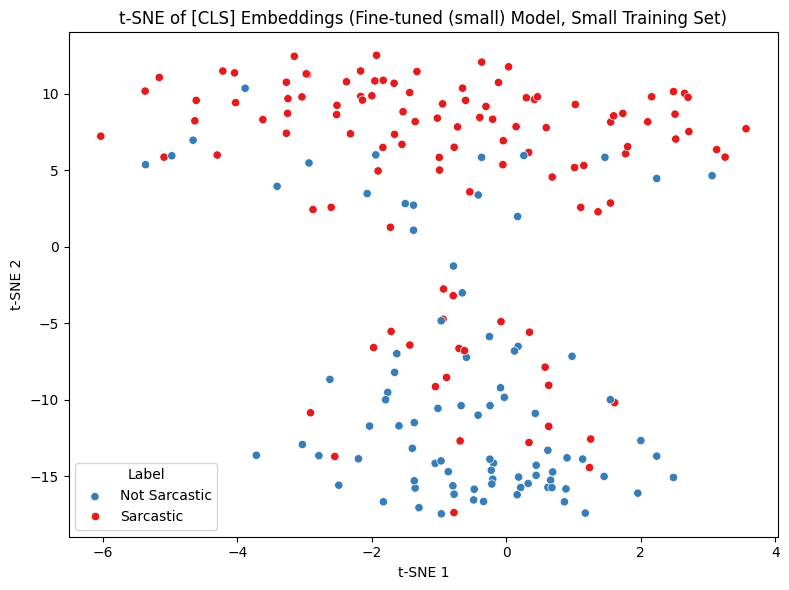

In [ ]:

# Evaluate the small-data fine-tuned model
small_preds, small_labels, _ = get_predictions(small_trainer, eval_dataset)
small_report = classification_report(small_labels, small_preds, target_names=["Not Sarcastic", "Sarcastic"])
print("DistilBERT (small training set) Classification Report:\n", small_report)

# Get embeddings before fine-tuning (base model) for the same sample
embs_base_small = get_cls_embeddings(vis_texts, base_model, tokenizer)

# Get embeddings after fine-tuning (small-data model)
embs_ft_small = get_cls_embeddings(vis_texts, small_model_cls.distilbert, tokenizer)

# t-SNE visualization for small-data model
for name, embs in zip(["Base (small)", "Fine-tuned (small)"], [embs_base_small, embs_ft_small]):
    tsne = TSNE(n_components=2, random_state=42)
    embs_2d = tsne.fit_transform(embs)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=embs_2d[:,0], y=embs_2d[:,1], hue=vis_labels, palette="Set1", legend="full")
    plt.title(f"t-SNE of [CLS] Embeddings ({name} Model, Small Training Set)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend(title="Label", labels=["Not Sarcastic", "Sarcastic"])
    plt.tight_layout()
    plt.savefig(f"tsne_{name.lower().replace(' ', '_').replace('(', '').replace(')', '')}_small.png")
    plt.show()



In [ ]:
print("DistilBERT (full-data) Classification Report:")
print(classification_report(labels, preds, target_names=["Not Sarcastic", "Sarcastic"]))

print("DistilBERT (small-data) Classification Report:")
print(classification_report(small_labels, small_preds, target_names=["Not Sarcastic", "Sarcastic"]))


DistilBERT (full-data) Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.92      0.93      0.93      3711
    Sarcastic       0.93      0.92      0.92      3444

     accuracy                           0.93      7155
    macro avg       0.93      0.92      0.93      7155
 weighted avg       0.93      0.93      0.93      7155

DistilBERT (small-data) Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.86      0.87      0.87      3711
    Sarcastic       0.86      0.85      0.86      3444

     accuracy                           0.86      7155
    macro avg       0.86      0.86      0.86      7155
 weighted avg       0.86      0.86      0.86      7155



In [ ]:
# preds, labels, texts = get_predictions(trainer, eval_dataset)
pred_df = pd.DataFrame({
    "text": texts,
    "true_label": labels,
    "predicted_label": preds
})
pred_df.to_csv("/content/drive/MyDrive/Colab Notebooks/sarcasm_predictions.csv", index=False)

## Part 2: Fine-Tuning DistilBERT

Next, we fine-tune a pretrained `distilbert-base-uncased` model from Hugging Face Transformers for sarcasm detection.

### Steps:
1. Tokenize the dataset.  
2. Add a classification head.  
3. Train the model for binary classification.  
4. Evaluate using Accuracy, Precision, Recall, and F1.  


DistilBERT (small training set) Classification Report:
                precision    recall  f1-score   support

Not Sarcastic       0.86      0.87      0.87      3711
    Sarcastic       0.86      0.85      0.86      3444

     accuracy                           0.86      7155
    macro avg       0.86      0.86      0.86      7155
 weighted avg       0.86      0.86      0.86      7155



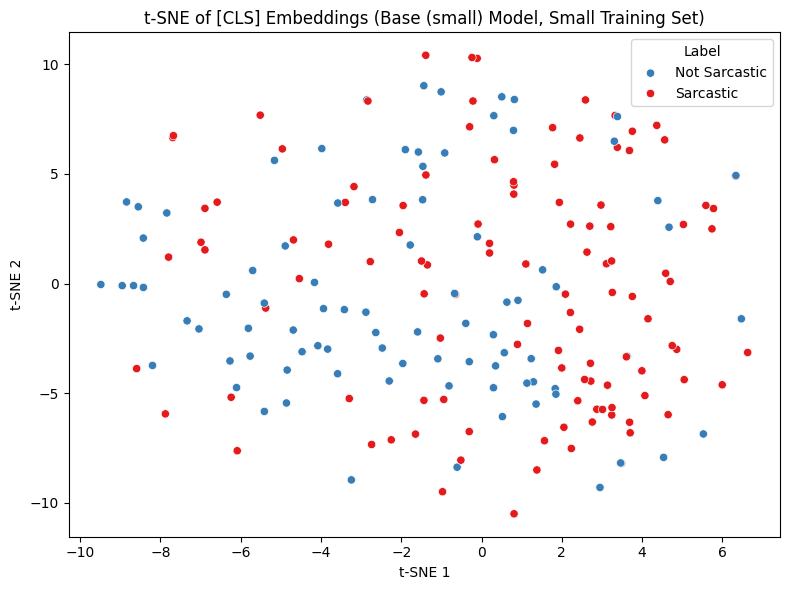

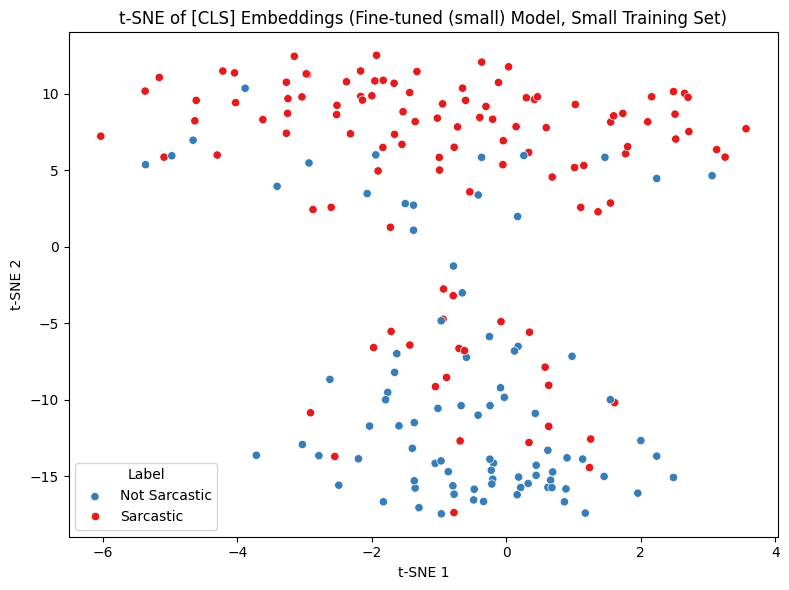

In [ ]:

# Evaluate the small-data fine-tuned model
small_preds, small_labels, _ = get_predictions(small_trainer, eval_dataset)
small_report = classification_report(small_labels, small_preds, target_names=["Not Sarcastic", "Sarcastic"])
print("DistilBERT (small training set) Classification Report:\n", small_report)

# Get embeddings before fine-tuning (base model) for the same sample
embs_base_small = get_cls_embeddings(vis_texts, base_model, tokenizer)

# Get embeddings after fine-tuning (small-data model)
embs_ft_small = get_cls_embeddings(vis_texts, small_model_cls.distilbert, tokenizer)

# t-SNE visualization for small-data model
for name, embs in zip(["Base (small)", "Fine-tuned (small)"], [embs_base_small, embs_ft_small]):
    tsne = TSNE(n_components=2, random_state=42)
    embs_2d = tsne.fit_transform(embs)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=embs_2d[:,0], y=embs_2d[:,1], hue=vis_labels, palette="Set1", legend="full")
    plt.title(f"t-SNE of [CLS] Embeddings ({name} Model, Small Training Set)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend(title="Label", labels=["Not Sarcastic", "Sarcastic"])
    plt.tight_layout()
    plt.savefig(f"tsne_{name.lower().replace(' ', '_').replace('(', '').replace(')', '')}_small.png")
    plt.show()



In [ ]:
print("DistilBERT (full-data) Classification Report:")
print(classification_report(labels, preds, target_names=["Not Sarcastic", "Sarcastic"]))

print("DistilBERT (small-data) Classification Report:")
print(classification_report(small_labels, small_preds, target_names=["Not Sarcastic", "Sarcastic"]))


DistilBERT (full-data) Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.92      0.93      0.93      3711
    Sarcastic       0.93      0.92      0.92      3444

     accuracy                           0.93      7155
    macro avg       0.93      0.92      0.93      7155
 weighted avg       0.93      0.93      0.93      7155

DistilBERT (small-data) Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.86      0.87      0.87      3711
    Sarcastic       0.86      0.85      0.86      3444

     accuracy                           0.86      7155
    macro avg       0.86      0.86      0.86      7155
 weighted avg       0.86      0.86      0.86      7155



In [ ]:
# preds, labels, texts = get_predictions(trainer, eval_dataset)
pred_df = pd.DataFrame({
    "text": texts,
    "true_label": labels,
    "predicted_label": preds
})
pred_df.to_csv("/content/drive/MyDrive/Colab Notebooks/sarcasm_predictions.csv", index=False)

## Part 3: Comparison and Analysis

### Performance Summary
We summarize results for both models:

| Model                 | Accuracy | Precision | Recall | F1  |
|------------------------|---------:|----------:|-------:|----:|
| Naive Bayes            |    0.79  |     0.79  |   0.78 | 0.79 |
| DistilBERT (full set)  |    0.93  |     0.93  |   0.92 | 0.93 |
| DistilBERT (small set) |    0.86  |     0.86  |   0.86 | 0.86 |

### Observations
- DistilBERT (full training set) significantly outperforms Naive Bayes across all metrics, especially F1.  
- Even with reduced training data, DistilBERT (small set) remains stronger than Naive Bayes, though with lower performance than the full set.  
- Naive Bayes is much faster and simpler, but misses context-dependent sarcasm cues.  
- DistilBERT provides robustness to nuance, but requires more compute.  

### Practical Trade-offs
- **Naive Bayes**: Lightweight and interpretable. Good as a quick baseline or for constrained environments.  
- **DistilBERT**: More accurate and robust. Recommended for production sarcasm detection where accuracy matters most, even at higher computational cost.  

